# Environment config

In [55]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import threading
from dash import Dash, dcc, html, Input, Output, jupyter_dash

%matplotlib inline

In [56]:
mapbox_token = "pk.eyJ1IjoidmVydWJlZSIsImEiOiJjbTJxOXR5ZngxMTF1Mmtxenp6aW16eTdjIn0.N-u6aPAAJvjY44ZLWfZPmw"

px.set_mapbox_access_token(mapbox_token)

# Importing data

In [57]:
df = pd.read_csv('Final_projects_files/project_1_python.csv', index_col='index',sep=',', decimal='.', encoding='UTF-8')

df.tail(1)

iso_code continent  location        date  total_cases  new_cases  \
index                                                                     
190612      ZWE    Africa  Zimbabwe  2022-06-18     254753.0        NaN   

        total_deaths  new_deaths  hosp_patients  total_tests  ...  \
index                                                         ...   
190612        5533.0         0.0            NaN          NaN  ...   

        people_vaccinated  people_fully_vaccinated  total_boosters  \
index                                                                
190612                NaN                      NaN             NaN   

        new_vaccinations  population  median_age  gdp_per_capita  \
index                                                              
190612               NaN  15092171.0        19.6        1899.775   

        life_expectancy  latitude  longitude  
index                                         
190612            61.49     -20.0       30.0  

[1 rows x 23 columns]

# First visualization

In [68]:
# selection of top 10 countries by population

unique_countries = df.drop_duplicates(subset=['location'])

top_10_countries = unique_countries.sort_values(by='population', ascending=False).head(10)


/var/folders/ly/b4ncvmb902ggx_hbc9vc3qy40000gp/T/ipykernel_37892/653217781.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/var/folders/ly/b4ncvmb902ggx_hbc9vc3qy40000gp/T/ipykernel_37892/653217781.py:11: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



[Text(0, 0, 'China'),
 Text(1, 0, 'India'),
 Text(2, 0, 'United States'),
 Text(3, 0, 'Indonesia'),
 Text(4, 0, 'Pakistan'),
 Text(5, 0, 'Brazil'),
 Text(6, 0, 'Nigeria'),
 Text(7, 0, 'Bangladesh'),
 Text(8, 0, 'Russia'),
 Text(9, 0, 'Mexico')]

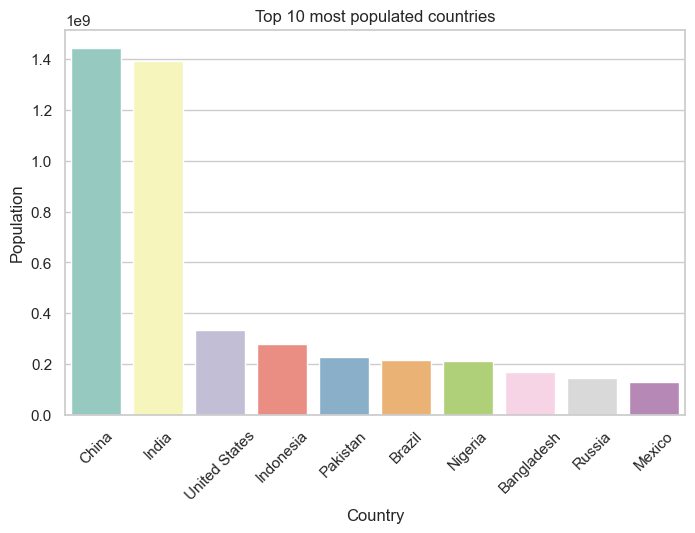

In [72]:
plt.figure(figsize=(8,5))
plt.title("Top 10 most populated countries")
plt.xlabel("Country")
plt.ylabel("Population")


sns.set_theme(style= 'whitegrid')
bar = sns.barplot(data=top_10_countries,palette='Set3',
                  x = "location",
                  y = "population")
bar.set_xticklabels(bar.get_xticklabels(), rotation=45)

In [60]:
print("The most populated country in the world is China.")
print("The 10th most populated country in the world is Mexico.")

The most populated country in the world is China.
The 10th most populated country in the world is Mexico.


# Population vs. life expectancy

In [61]:
color_palette = ["#00e8fc", "#f96e46", "#295135", "#8c2155", "#8d80ad", "#87D68D"]


fig = px.scatter(
    df,
    x="population",
    y="life_expectancy",
    log_x=True,
    color="continent",
    title="Relationship Between Population and Life Expectancy by Country",
    color_discrete_sequence=color_palette
)
fig.update_layout(
    xaxis_title = "Population (Logarithmic scale)",
    yaxis_title = "Life expectancy in years",
    legend_title = "Continent"
)
fig.show()


In [62]:
print("There is no evidence that more populated countries have higher life expectancy.")

There is no evidence that more populated countries have higher life expectancy.


# Number of diagnosed cases

In [63]:
chosen_countries = df[df['location'].isin(['Peru','Spain'])]

color_palette2 = ["#8c2155", "#87D68D"]

fig = px.line(data_frame=chosen_countries,
              x = "date",
              y = "new_cases",
              color = "location",
              color_discrete_sequence=color_palette2,
              title= "Number of new covid cases in time in Peru and Spain",
              line_dash = "location"
             )

fig.update_layout(xaxis_title = "Date",
                  yaxis_title = "Number of new cases",
                  legend_title = "Country")
fig.update_layout(
    autosize=False,
    width=1000,
    height=400,
)

fig.show()


# Covid-19 map

In [64]:
agg_cases = df.groupby(['location', 'population', 'continent', 'latitude', 'longitude'], as_index=False).agg({'total_cases': 'max'})

agg_cases['ratio'] = agg_cases['total_cases'] / agg_cases['population']

agg_cases['ratio'].replace([float('inf'), float('-inf')], 0, inplace=True)
agg_cases['ratio'].fillna(0, inplace=True)

agg_cases.head(1)

/var/folders/ly/b4ncvmb902ggx_hbc9vc3qy40000gp/T/ipykernel_37892/866601281.py:5: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/var/folders/ly/b4ncvmb902ggx_hbc9vc3qy40000gp/T/ipykernel_37892/866601281.py:6: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df

location  population continent  latitude  longitude  total_cases  \
0  Afghanistan  39835428.0      Asia      33.0       65.0     181574.0   

      ratio  
0  0.004558

In [65]:


fig = px.scatter_mapbox(
    agg_cases,
    lat='latitude',
    lon='longitude',
    color='continent',
    size='ratio',
    size_max = 15,
    zoom = 1,
    hover_name='location',
    hover_data={'location': True, 'total_cases': True, 'population': True},
    mapbox_style='dark',
    title='Covid-19 Cases by Country throughout the pandemic'
)

fig.update_layout(margin=dict(l=10, r=10, t=40, b=10),
                  legend_title = "Continent")

fig.show()